In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Make classification data

<IPython.core.display.Javascript object>


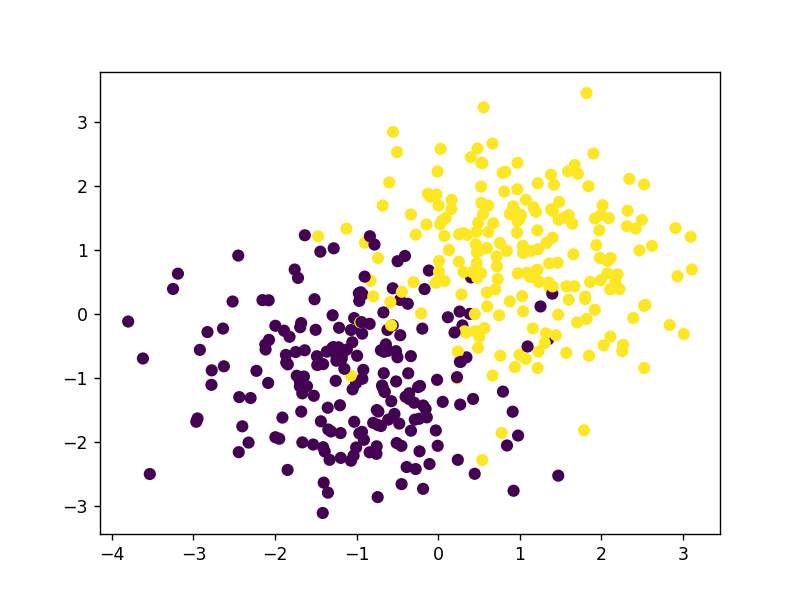

In [21]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=[[-1.0,-1.0], [1.0,1.0]], n_features=2, random_state=200, shuffle=True) #[[-1.5,-1.5], [1.5,1.5]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure()
plt.scatter(X_train.T[0], X_train.T[1], c=y_train)

# Define Gaussian function

In [22]:
def gaussian(x, μ, Σ):
    k = len(μ) # Dimensions of the data
    return np.exp(-(1/2)* (x-μ) @ np.linalg.inv(Σ) @ np.transpose(x-μ)) / (np.sqrt( (2*np.pi)**k * np.linalg.det(Σ) ) )

# Classifier

In [23]:
class GDA:
    def __init__(self):
        self.ϕ = None
        self.μ0 = None
        self.μ1 = None
        self.Σ = None
        
    def fit(self, X, y):
        m, n = X.shape
        
        # Parameters from maximum likelihood estimation
        self.ϕ = np.mean(y)
        self.μ0 = np.array([np.sum((y == 0) * X.T[i]) for i in range(n)]) / np.sum(y)
        self.μ1 = np.array([np.sum((y == 1) * X.T[i]) for i in range(n)]) / np.sum(y)
        
        μ = np.array([self.μ0, self.μ1])
        Σ = 0
        for i in range(m):
            Σ += (X[i] - μ[y[i]]).reshape((-1,1)) * (X[i] - μ[y[i]])
        self.Σ = Σ/ m
        
    def predict(self, x):
        return np.array([self.__predict_each_one(x_i) for x_i in x])
    
    def accuracy_score(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)
    
    # Private methods    
    def __predict_each_one(self, x):
        # Compute p(x|y=0) and p(x|y=1)
        μ = np.array([self.μ0, self.μ1])
        p_x_y = np.array([self.__gaussian(x, μ[i], self.Σ) for i in range(2)])
        
        # Compute p(y)
        p_y = np.array([self.ϕ**y_i * (1-self.ϕ)**(1 - y_i) for y_i in range(2)])
        return np.argmax(p_x_y * p_y)
    
    
    def __gaussian(self, x, μ, Σ):
        k = len(μ) # Dimensions of the data
        return np.exp(-(1/2)* (x-μ) @ np.linalg.inv(Σ) @ np.transpose(x-μ)) / (np.sqrt( (2*np.pi)**k * np.linalg.det(Σ) ) )

# Test the module

In [24]:
GDAclassifier = GDA()
GDAclassifier.fit(X_train, y_train)
print(GDAclassifier.ϕ, GDAclassifier.μ0, GDAclassifier.μ1, GDAclassifier.Σ)

0.4975 [-1.0108095  -0.97389633] [1.00345379 0.87283912] [[ 0.90815817 -0.08628196]
 [-0.08628196  0.92446904]]


### Make prediction

In [25]:
GDAclassifier.accuracy_score(y_test, GDAclassifier.predict(X_test))

0.89

### Gaussians of the data

In [26]:
square = 5
x1 = np.linspace(-square, square, 100, endpoint=True,)
x2 = np.linspace(-square, square, 100, endpoint=True)

# Meshgrid
x1v, x2v = np.meshgrid(x1, x2)
x1v_rows, x1v_columns = x1v.shape

In [27]:
# Gaussian of negative class
gaussian0_pts = np.zeros(np.array(x1v).shape) 
for i in range(x1v_rows):
    for j in range(x1v_columns):
        gaussian0_pts[i,j] =  gaussian(np.array([x1v[i,j], x2v[i,j]]), GDAclassifier.μ0, GDAclassifier.Σ)
        
        
# Gaussian of positive class
gaussian1_pts = np.zeros(np.array(x1v).shape) 
for i in range(x1v_rows):
    for j in range(x1v_columns):
        gaussian1_pts[i,j] =  gaussian(np.array([x1v[i,j], x2v[i,j]]), GDAclassifier.μ1, GDAclassifier.Σ)

<IPython.core.display.Javascript object>


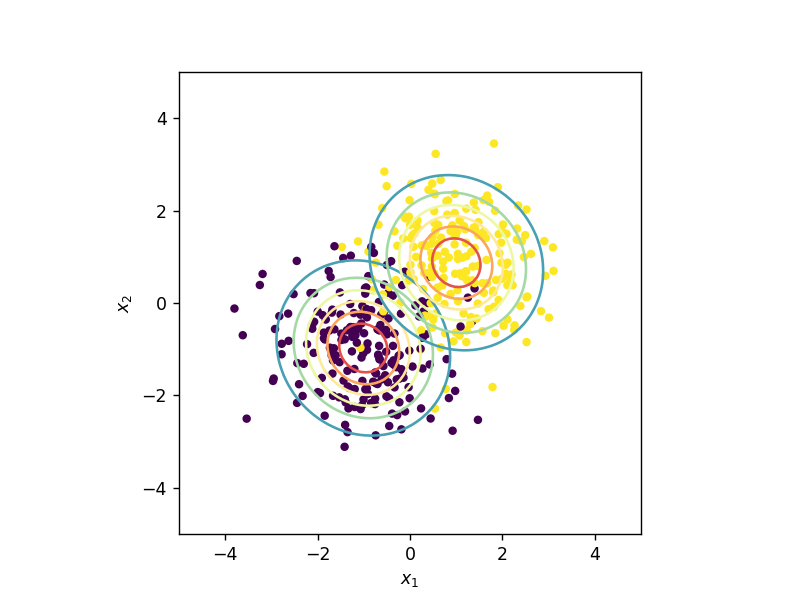

(-5.0, 5.0)

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)#211
ax.scatter(X_train.T[0], X_train.T[1], c=y_train, s=15)
ax.contour(x1v, x2v, gaussian0_pts, cmap='Spectral_r')
ax.contour(x1v, x2v, gaussian1_pts, cmap='Spectral_r')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_aspect('equal') 
ax.set_xlim(-square, square)
ax.set_ylim(-square, square)

# ax = fig.add_subplot(212, projection='3d')
# ax.plot_surface(x1v, x2v, gaussian0_pts, cmap='Spectral_r', antialiased=True)
# ax.plot_surface(x1v, x2v, gaussian1_pts, cmap='Spectral_r', antialiased=True)
# ax.set_xlabel(r'$x_1$')
# ax.set_ylabel(r'$x_2$')
# ax.set_zlabel(r'$P(x)$')
# ax.set_aspect('equal') 